# 1. 패키지 및 한글 불러옴

In [ ]:
# 한글 불러옴
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (13.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and direc

In [ ]:
# 런타임 다시 시작

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family='NanumGothic')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from google.colab import drive


# 2. 데이터 가져오기

In [ ]:
drunk_acci_raw = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/1 교통사고/2 서울시 행정구별 음주운전 교통사고 현황.csv',
                 encoding='utf-8')

drunk_acci_raw.describe(include='all')
drunk_acci_raw.head()

,자치구별(1),자치구별(2),2014,2014.1,2014.2,2015,2015.1,2015.2,2016,2016.1,...,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2,2023,2023.1,2023.2
0,자치구별(1),자치구별(2),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),...,부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명)
1,서울시,소계,3361,30,6039,3453,41,6205,2874,41,...,3817,2059,23,3307,2348,23,3904,1938,8,3113
2,서울시,종로구,74,-,138,68,-,100,77,-,...,71,45,-,74,56,-,87,52,-,73
3,서울시,중구,64,2,98,57,-,131,51,-,...,64,43,-,78,45,-,73,37,-,55
4,서울시,용산구,108,1,199,135,4,246,118,1,...,105,72,-,118,94,3,148,64,2,114


#3. 데이터 전처리

In [ ]:
# 첫 번째 행을 선택하여 '발생건수 (건)'에 해당하는 열만 남김
condition = drunk_acci_raw.iloc[0] == '발생건수 (건)'
columns_to_keep = drunk_acci_raw.columns[condition]

# 첫 번째 행과 두 번째 행을 포함한 새로운 데이터프레임 생성
drunk_acci_proc = drunk_acci_raw.loc[:, ['자치구별(2)'] + list(columns_to_keep)]

# 결과 출력
print(drunk_acci_proc.head())

   자치구별(2)      2014      2015      2016      2017      2018      2019  \
0  자치구별(2)  발생건수 (건)  발생건수 (건)  발생건수 (건)  발생건수 (건)  발생건수 (건)  발생건수 (건)   
1       소계      3361      3453      2874      2864      2856      2190   
2      종로구        74        68        77        70        63        48   
3       중구        64        57        51        39        70        30   
4      용산구       108       135       118       106       100        73   

       2020      2021      2022      2023  
0  발생건수 (건)  발생건수 (건)  발생건수 (건)  발생건수 (건)  
1      2327      2059      2348      1938  
2        47        45        56        52  
3        49        43        45        37  
4        65        72        94        64  


In [ ]:
# 첫 번째 행만 선택하여 데이터프레임을 유지
#df = df.iloc[0:2]

# 첫 번째 행을 지우기
drunk_acci_proc = drunk_acci_proc.drop([0,1]).reset_index(drop=True)

# 결과 출력
drunk_acci_proc.head()

,자치구별(2),2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,종로구,74,68,77,70,63,48,47,45,56,52
1,중구,64,57,51,39,70,30,49,43,45,37
2,용산구,108,135,118,106,100,73,65,72,94,64
3,성동구,121,88,80,79,85,61,80,87,71,50
4,광진구,150,148,104,77,107,62,83,72,66,57


In [ ]:
# 첫 번째 열 인덱스로
drunk_acci_proc.set_index(drunk_acci_proc.columns[0], inplace=True)

In [ ]:
# 숫자형으로 변환할 열 선택
columns_to_convert = ['2014', '2015','2016', '2017','2018', '2019', '2020', '2021', '2022', '2023']

# 각 열을 숫자형으로 변환
drunk_acci_proc[columns_to_convert] = drunk_acci_proc[columns_to_convert].astype(int)

drunk_acci_proc.describe(include='all')

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,134.440000,138.120000,114.960000,114.560000,114.240000,87.600000,93.080000,82.360000,93.920000,77.520000
std,76.771349,82.247249,70.540461,73.856889,66.022269,54.066317,61.370405,49.994066,67.061489,50.238697
min,56.000000,57.000000,48.000000,39.000000,44.000000,30.000000,39.000000,37.000000,40.000000,34.000000
25%,94.000000,94.000000,80.000000,77.000000,79.000000,62.000000,63.000000,54.000000,59.000000,52.000000
50%,110.000000,122.000000,97.000000,94.000000,97.000000,73.000000,80.000000,72.000000,72.000000,58.000000
75%,150.000000,154.000000,119.000000,119.000000,119.000000,103.000000,91.000000,100.000000,94.000000,89.000000
max,426.000000,470.000000,406.000000,403.000000,373.000000,293.000000,343.000000,281.000000,368.000000,263.000000


In [ ]:
# 컬럼들을 읽기
columns = drunk_acci_proc.columns
print(columns)


Index(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')


#4. 데이터 탐색 시각화

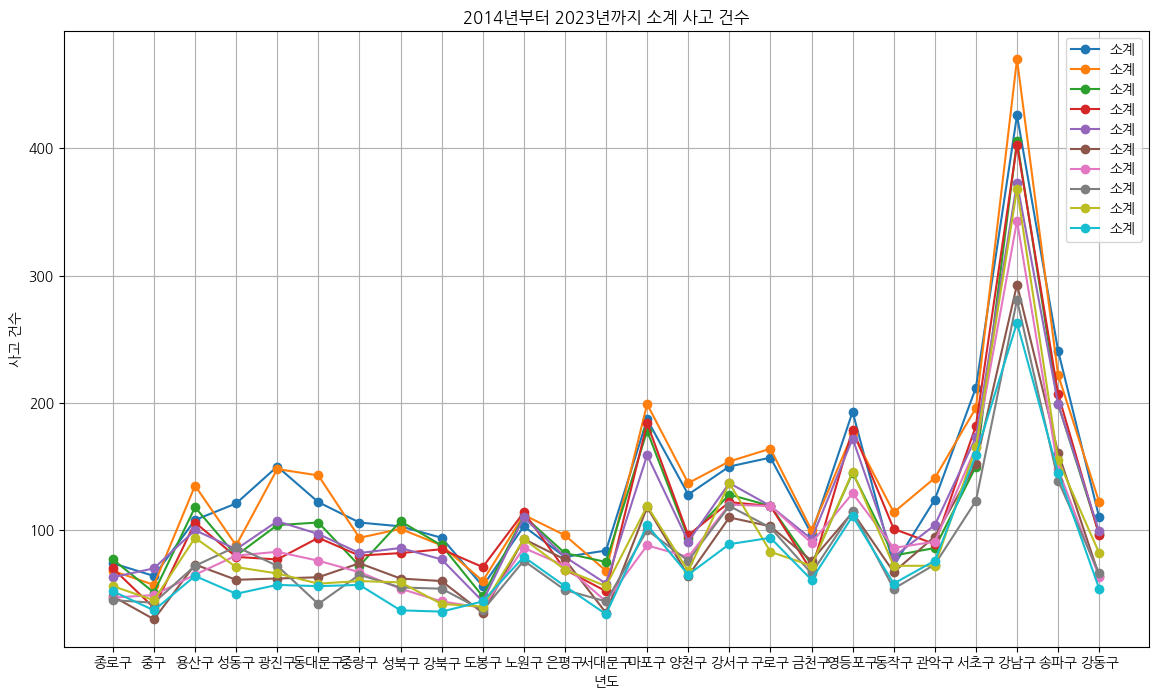

In [ ]:
import matplotlib.pyplot as plt

# '소계'인 첫 번째 행만 나타내는 그래프

plt.figure(figsize=(14, 8))

first_row = drunk_acci_proc.iloc[0, 1:]
plt.plot(drunk_acci_proc, marker='o', label='소계')

# 그래프 제목 및 축 레이블 설정
plt.title('2014년부터 2023년까지 소계 사고 건수')
plt.xlabel('년도')
plt.ylabel('사고 건수')
plt.legend(loc='upper right')
plt.grid(True)

# 그래프 보여주기
plt.show()

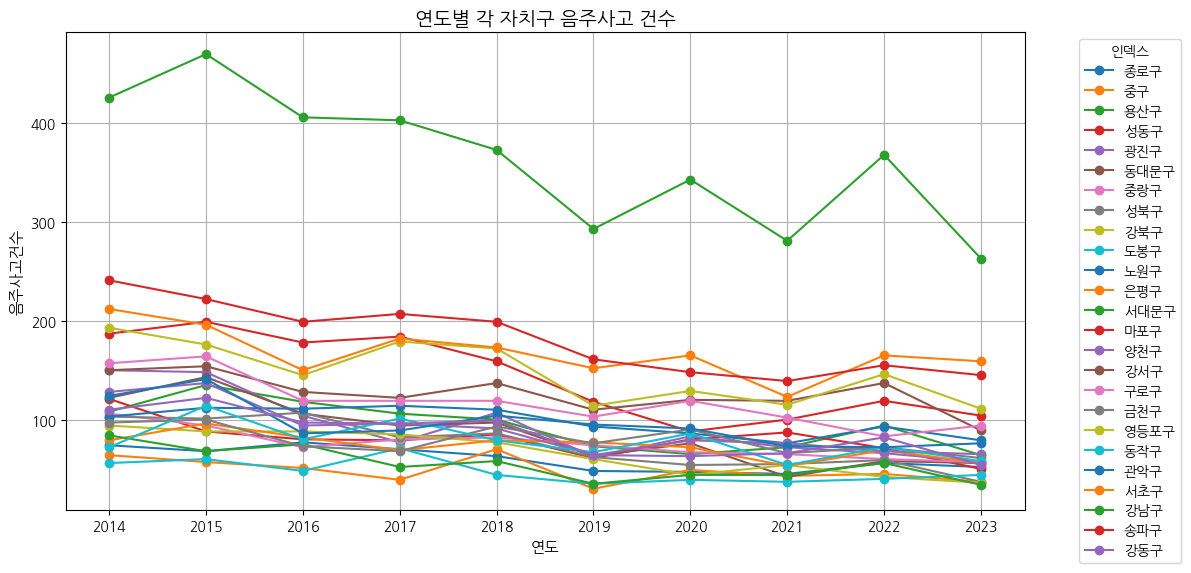

In [ ]:
# 데이터프레임의 각 열(인덱스)을 꺾은선 그래프로 표현
plt.figure(figsize=(12, 6))

for idx in drunk_acci_proc.index:
    plt.plot(drunk_acci_proc.columns, drunk_acci_proc.loc[idx], marker='o', linestyle='-', label=idx)

# 그래프 제목과 축 레이블 설정
plt.title('연도별 각 자치구 음주사고 건수',fontsize=14)
plt.xlabel('연도',fontsize=11)
plt.ylabel('음주사고건수',fontsize=11)
plt.legend(title='인덱스', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)  # x축 레이블 회전

# 그래프 표시
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 나머지 자치구들의 값을 나타내는 그래프

plt.figure(figsize=(14, 8))

for idx in range(1, len(drunk_acci_proc)):
    district = drunk_acci_proc.iloc[0]
    district_data = drunk_acci_proc.iloc[1:]
    plt.plot(district_data.index, district_data.values, marker='o', label=district)

# 그래프 제목 및 축 레이블 설정
plt.title('2014년부터 2023년까지 각 자치구별 사고 건수')
plt.xlabel('년도')
plt.ylabel('사고 건수')
plt.legend(loc='upper right')
plt.grid(True)

# 그래프 보여주기
plt.show()

In [ ]:
# 2022년과 2023년의 평균을 구하기
drunk_acci_proc['평균'] = drunk_acci_proc[['2022', '2023']].mean(axis=1)

# 평균을 기준으로 정렬하여 순위 매기기
df_sorted = drunk_acci_proc.sort_values(by='평균', ascending=False)

# 순위를 계산하여 순위 열을 추가합니다
df_sorted['순위'] = np.arange(1, len(drunk_acci_proc) + 1)

# 결과 확인
print(df_sorted)

   자치구별(2)  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023  \
0       소계  3361  3453  2874  2864  2856  2190  2327  2059  2348  1938   
23     강남구   426   470   406   403   373   293   343   281   368   263   
22     서초구   212   196   150   182   173   152   165   123   165   159   
24     송파구   241   222   199   207   199   161   148   139   155   145   
19    영등포구   193   176   145   179   172   114   129   115   146   111   
16     강서구   150   154   128   122   137   110   120   119   137    89   
14     마포구   187   199   178   184   159   118    88   100   119   104   
17     구로구   157   164   119   119   119   103   119   102    83    94   
11     노원구   103   112   111   114   110    93    86    76    93    79   
3      용산구   108   135   118   106   100    73    65    72    94    64   
21     관악구   124   141    86    89   104    95    91    73    72    76   
25     강동구   110   122    97    96    99    64    63    66    82    54   
15     양천구   128   137    94    96    

In [ ]:
import pandas as pd
import numpy as np

# 첫 번째 행인 '소계'를 제외한 데이터프레임을 만듭니다
df_without_total = drunk_acci_proc.iloc[1:].copy()

# 2022년과 2023년의 평균을 구하기
df_without_total['평균'] = df_without_total[['2022', '2023']].mean(axis=1)

# 평균을 기준으로 정렬하여 순위 매기기
df_sorted = df_without_total.sort_values(by='평균', ascending=False)

# 순위를 계산하여 순위 열을 추가합니다
df_sorted['순위'] = np.arange(1, len(df_sorted) + 1)

# 첫 번째 행인 '소계'를 포함하여 최종 데이터프레임을 만듭니다
final_df = pd.concat([drunk_acci_proc.iloc[[0]], df_sorted])

# 결과 확인
print(final_df)


   자치구별(2)  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023  \
0       소계  3361  3453  2874  2864  2856  2190  2327  2059  2348  1938   
23     강남구   426   470   406   403   373   293   343   281   368   263   
22     서초구   212   196   150   182   173   152   165   123   165   159   
24     송파구   241   222   199   207   199   161   148   139   155   145   
19    영등포구   193   176   145   179   172   114   129   115   146   111   
16     강서구   150   154   128   122   137   110   120   119   137    89   
14     마포구   187   199   178   184   159   118    88   100   119   104   
17     구로구   157   164   119   119   119   103   119   102    83    94   
11     노원구   103   112   111   114   110    93    86    76    93    79   
3      용산구   108   135   118   106   100    73    65    72    94    64   
21     관악구   124   141    86    89   104    95    91    73    72    76   
25     강동구   110   122    97    96    99    64    63    66    82    54   
15     양천구   128   137    94    96    

In [ ]:
# 필요한 열만 선택하여 출력합니다
final_df2=final_df[['자치구별(2)', '평균', '순위']]

In [ ]:
final_df2

,자치구별(2),평균,순위
0,소계,2143.0,NaN
23,강남구,315.5,1.0
22,서초구,162.0,2.0
24,송파구,150.0,3.0
19,영등포구,128.5,4.0
16,강서구,113.0,5.0
14,마포구,111.5,6.0
17,구로구,88.5,7.0
11,노원구,86.0,8.0
3,용산구,79.0,9.0


In [ ]:
final_df2 = final_df2.rename(columns={'자치구별(2)': '구별', '평균': '음주운전사고수'})

In [ ]:
final_df2

,구별,음주운전사고수,순위
0,소계,2143.0,NaN
23,강남구,315.5,1.0
22,서초구,162.0,2.0
24,송파구,150.0,3.0
19,영등포구,128.5,4.0
16,강서구,113.0,5.0
14,마포구,111.5,6.0
17,구로구,88.5,7.0
11,노원구,86.0,8.0
3,용산구,79.0,9.0


In [ ]:
final_df2.drop(index=0, inplace=True)
final_df2

,구별,음주운전사고수,순위
23,강남구,315.5,1.0
22,서초구,162.0,2.0
24,송파구,150.0,3.0
19,영등포구,128.5,4.0
16,강서구,113.0,5.0
14,마포구,111.5,6.0
17,구로구,88.5,7.0
11,노원구,86.0,8.0
3,용산구,79.0,9.0
21,관악구,74.0,10.0


In [ ]:
file_path = '/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/구별교통사고건수.csv'
final_df2.to_csv(file_path, index=False)